Ciclo Crisis 52-55 ignorado (fuera de rango)
Ciclo Expansión 56-69 ignorado (fuera de rango)
Ciclo Recesión 70-81 ignorado (fuera de rango)
Ciclo Crisis 82-84 ignorado (fuera de rango)


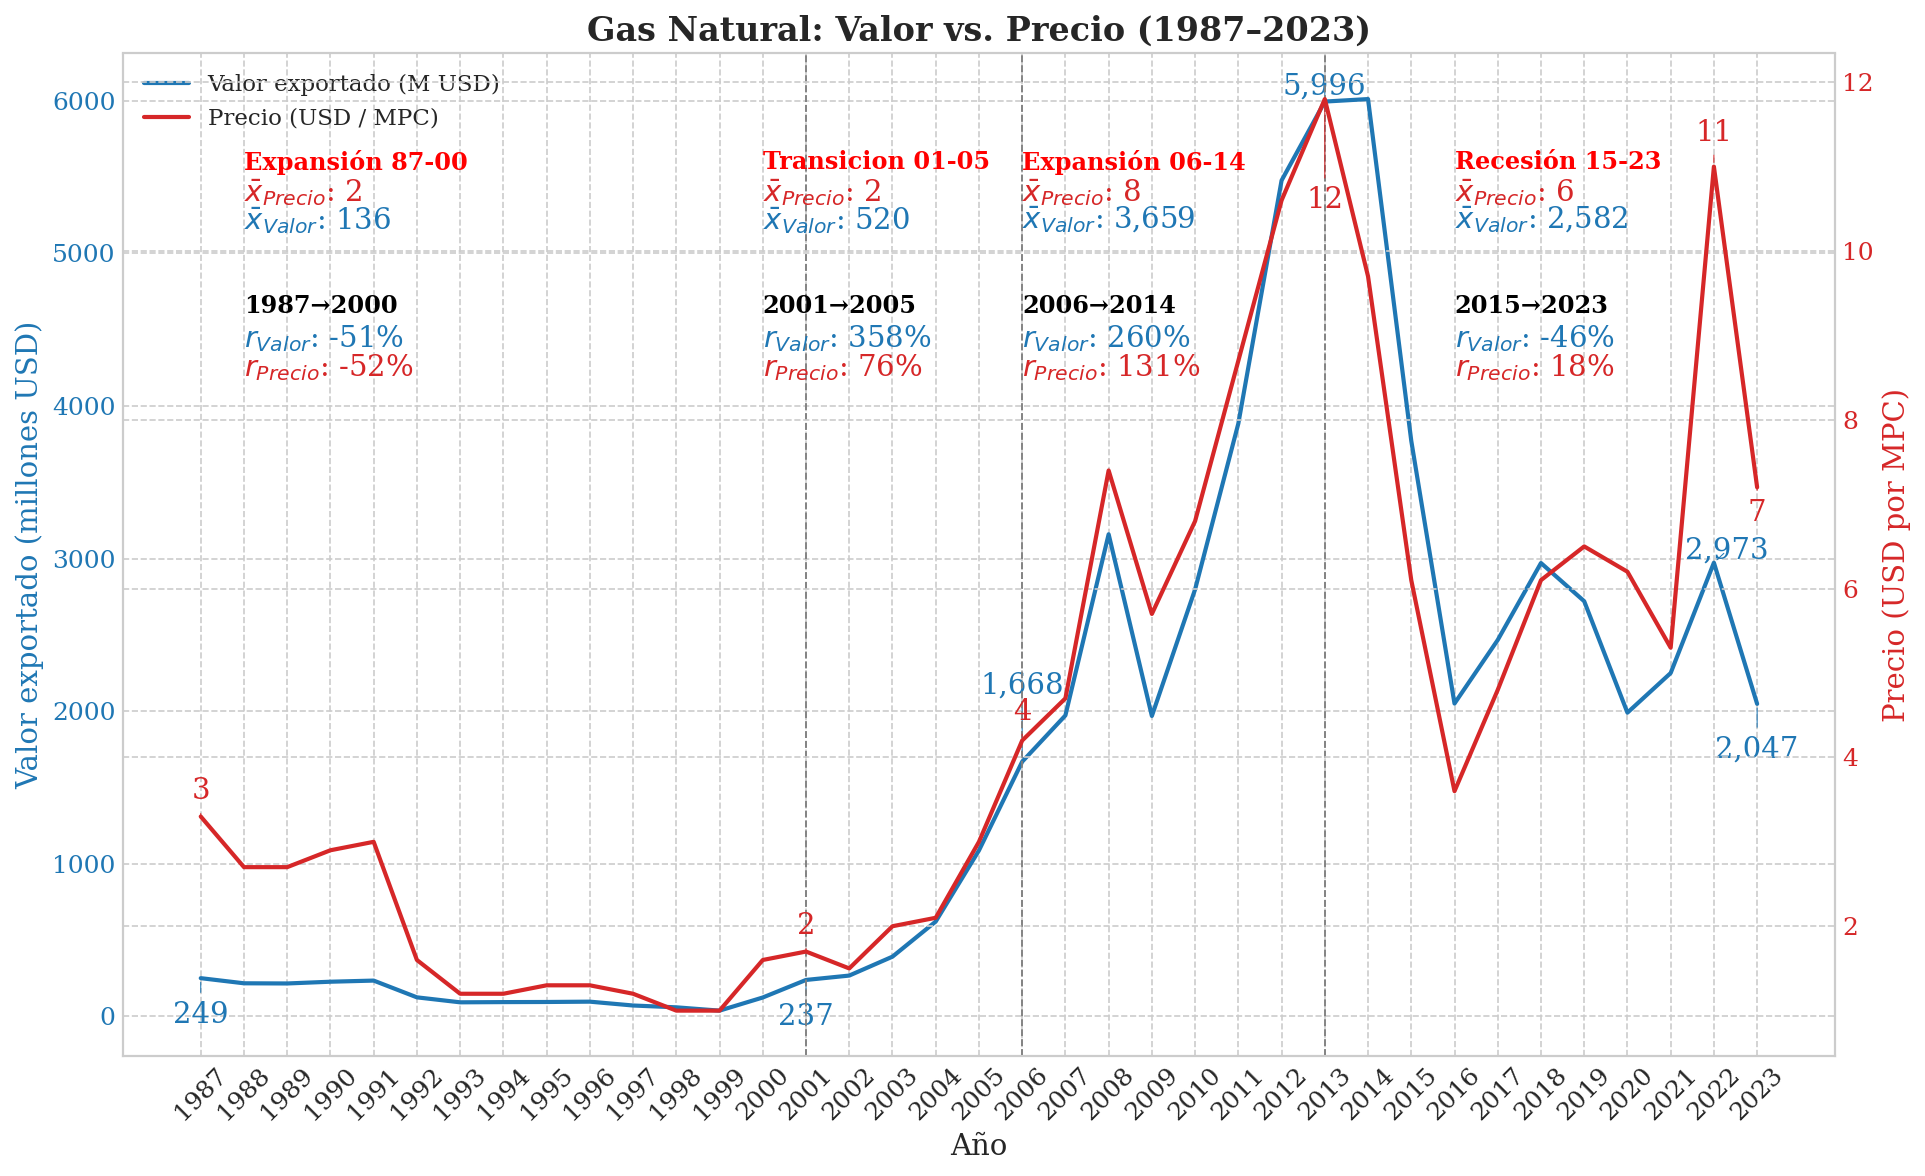

In [1]:
"""
Gas natural: Valor exportado vs. precio (1987-2023)
Versión que usa *exclusivamente* los helpers de graficos_utils
y oculta las entradas «_child…» de la leyenda.
"""

# ── 0. Imports ───────────────────────────────────────────────────────
import sys, os, sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# helpers propios
from func_auxiliares.config import *
from func_auxiliares.graficos_utils import *

# ── 1. Configuración general ─────────────────────────────────────────
OUTPUT_DIR = ASSETS_DIR / "serie_completa" / "exportacion_gas_natural"
os.makedirs(OUTPUT_DIR, exist_ok=True)

set_style()

# ── 2. Carga de datos ────────────────────────────────────────────────
with sqlite3.connect(DB_PATH) as conn:
    df = (pd.read_sql(
            "SELECT año, valor, precio_usd_mpc "
            "FROM exportacion_gas_natural", conn, index_col="año")
          .sort_index())               # 1987-2024

df["valor_musd"] = df["valor"] / 1_000     # miles USD → millones
df.drop(columns="valor", inplace=True)

# ── 3. Definición de componentes y abreviaturas ──────────────────────
cols   = ["valor_musd", "precio_usd_MPC"]
abbr   = {"valor_musd": "Valor", "precio_usd_MPC": "Precio"}
colors = {"valor_musd": "#1f77b4", "precio_usd_MPC": "#d62728"}

# ── 4. Preparación de anotaciones y ciclos ──────────────────────────
annot_years = adjust_annot_years(df, annot_years)

cycles      = adjust_cycles(df, CYCLES)
cycle_stats = {n: df.loc[s].mean().to_dict() for n, s in cycles.items()}
periodos    = adjust_periods(df, periodos_tasas)

#modificaciones a los dicts
annot_years.extend([2013, 2022])
hitos_v_modificado=update_dict(
    hitos_v,
    rename_map={2014:2013}
)
# ── 5. Offsets y posicionamientos ────────────────────────────────────
hitos_offset = {2000: .59, 2006: .62, 2013: .48}

annotation_offsets = {
    "valor_musd": {
        1987: (0, -240),
        2001: (0, -240),
        2006: (0,  500),
        2013: (0,  100),
        2022: (0.3,  80),
        2023: (0, -300),
    },
    "precio_usd_MPC": {
        1987: (0,  0.3),
        2001: (0,  0.3),
        2006: (0,  0.34),
        2013: (0, -1.2),
        2022: (0, 0.4),
        2023: (0, -0.3),
    },
}

period_growth_offsets = {
    "1987-2000": (1988, 0.75),
    "2001-2005": (2000, 0.75),
    "2006-2014": (2006, 0.75),
    "2015-2023": (2016, 0.75),
}

medias_offset = {
    "Expansión 87-00":  (1988, .90),
    "Transicion 01-05": (2000, .90),
    "Expansión 06-14":  (2006, .90),
    "Recesión 15-23":   (2016, .90),
}

# ── 6. Generación de la gráfica ──────────────────────────────────────
fig, ax_val = plt.subplots(figsize=(13, 8))
ax_price    = ax_val.twinx()

# ‣ Series principales
ax_val.plot(df.index, df["valor_musd"],
            label="Valor exportado (M USD)",
            color=colors["valor_musd"])
ax_price.plot(df.index, df["precio_usd_MPC"],
              label="Precio (USD / MPC)",
              color=colors["precio_usd_MPC"])

# ‣ Elementos auxiliares (helpers)
add_hitos(ax_val, df.index, hitos_v_modificado, hitos_offset,
          line_kwargs={"linewidth": .9})

y_max = df["valor_musd"].max()
add_cycle_means_multi(ax_val, cycle_stats, medias_offset,
                      abbr, colors, line_spacing=y_max * .03)

add_year_value_annotations(
    ax_val, df, annot_years,
    ["valor_musd"],
    {"valor_musd": annotation_offsets["valor_musd"]},
    {"valor_musd": colors["valor_musd"]},
    arrow_lw=.5
)

add_year_value_annotations(
    ax_price, df, annot_years,
    ["precio_usd_MPC"],
    {"precio_usd_MPC": annotation_offsets["precio_usd_MPC"]},
    {"precio_usd_MPC": colors["precio_usd_MPC"]},
    arrow_lw=.5
)

add_period_growth_annotations_multi(
    ax_val, df, periodos,
    cols, period_growth_offsets,
    colors, abbr
)

# ‣ Etiquetas y leyenda limpia
ax_val.set_title(f"Gas Natural: Valor vs. Precio ({df.index[0]}–{df.index[-1]})",
                 fontweight="bold")
ax_val.set_xlabel("Año")
ax_val.set_ylabel("Valor exportado (millones USD)",
                  color=colors["valor_musd"])
ax_price.set_ylabel("Precio (USD por MPC)",
                    color=colors["precio_usd_MPC"])

ax_val.tick_params(axis="y", labelcolor=colors["valor_musd"])
ax_price.tick_params(axis="y", labelcolor=colors["precio_usd_MPC"])
ax_val.set_xticks(df.index[::max(1, len(df)//31)])
ax_val.tick_params(axis="x", rotation=45)

# ‣ Leyenda sin _childX
handles, labels = ax_val.get_legend_handles_labels()
handles2, labels2 = ax_price.get_legend_handles_labels()
handles += handles2
labels  += labels2

filtered = [(h, l) for h, l in zip(handles, labels) if not l.startswith('_')]
if filtered:
    h_f, l_f = zip(*filtered)
    ax_val.legend(h_f, l_f, loc="upper left", fontsize=11)

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR,
            "gas_natural_valor_precio_dual_axis.png"), dpi=300)
plt.show()


Ciclo Crisis 52-55 ignorado (fuera de rango)
Ciclo Expansión 56-69 ignorado (fuera de rango)
Ciclo Recesión 70-81 ignorado (fuera de rango)
Ciclo Crisis 82-84 ignorado (fuera de rango)


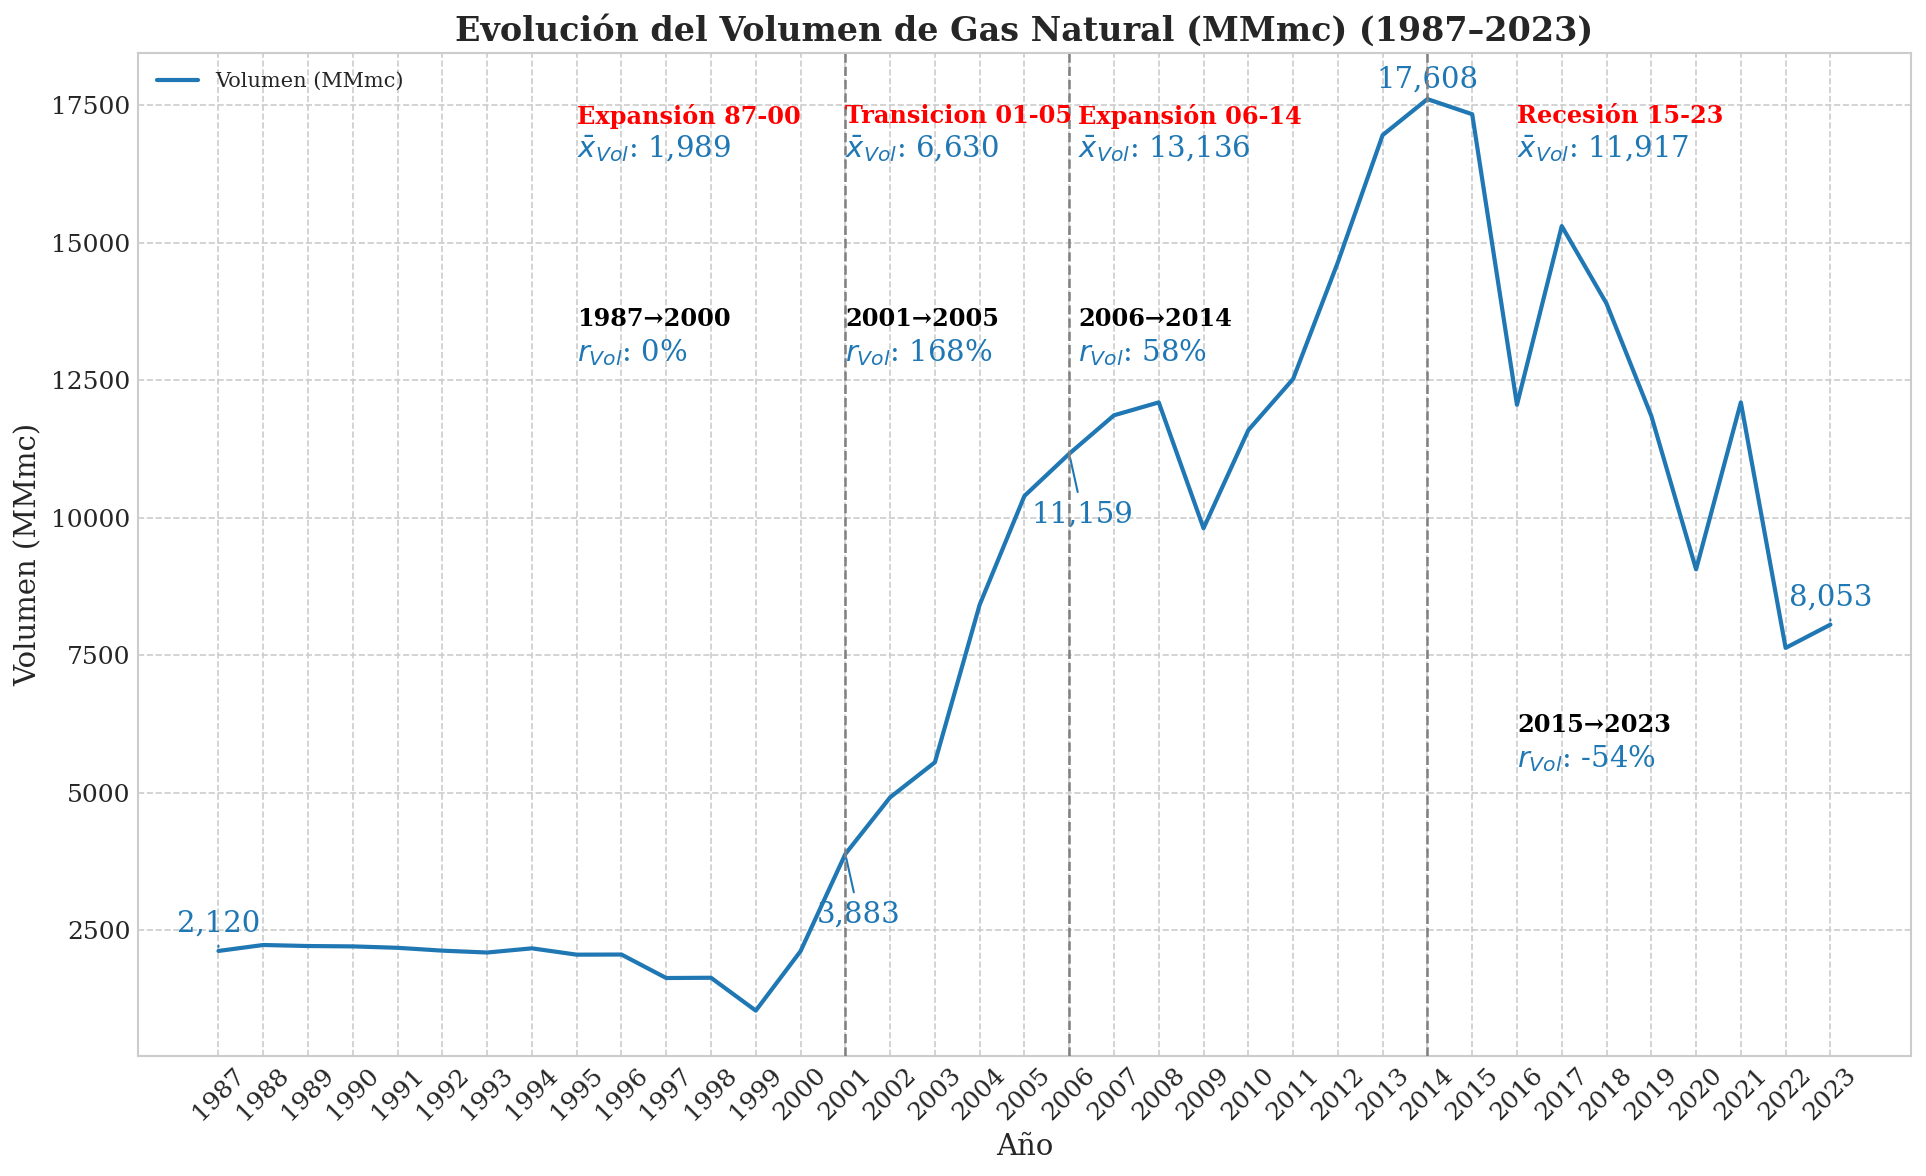

In [2]:
# ── 1. Nueva carga de datos (solo volumen) ───────────────────────────
with sqlite3.connect("../../../../db/proyectomacro.db") as conn:
    df_vol = (
        pd.read_sql(
            "SELECT año, volumen_MMMc FROM exportacion_gas_natural",
            conn,
            index_col="año"
        )
        .sort_index()
    )

# ── 2. Definición de ciclos y estadísticas ───────────────────────────
annot_years_vol     = adjust_annot_years(df_vol, annot_years)
cycles_vol      = adjust_cycles(df_vol, CYCLES)
cycle_stats_vol = {
    name: df_vol.loc[slice_].mean().to_dict()
    for name, slice_ in cycles_vol.items()
}

# ── 3. Hitos, años clave y offsets ────────────────────────────────────
hitos_offset = {yr: 0.88 for yr in hitos_v}
annotation_offsets_vol = {
    "volumen_MMMc": {
        1987: (0, 500),
        2001: (0.3, -1100),
        2006: (0.3, -1100),
        2014: (0, 350),
        2023: (0, 500),
    }
}

# ── 4. Periodos de crecimiento y offsets ─────────────────────────────
periodos_vol = adjust_periods(df_vol, periodos_tasas)
period_growth_offsets = {
    "1987-2000": (1995, 0.75),
    "2001-2005": (2001, 0.75),
    "2006-2014": (2006.2, 0.75),
    "2015-2023": (2016, 0.35),
}

# ── 5. Offset para medias de ciclo ───────────────────────────────────
cycle_text_offsets = {
    "Expansión 87-00": (1995, 0.95),
    "Transicion 01-05":    (2001, 0.95),
    "Expansión 06-14": (2006.2, 0.95),
    "Recesión 15-23":  (2016, 0.95),
}

# ── 6. Paleta y abreviatura ──────────────────────────────────────────
colors_vol = {"volumen_MMMc": "tab:blue"}
abbr_vol   = {"volumen_MMMc": "Vol"}

# ── 7. Gráfico de volumen ────────────────────────────────────────────
fig_v, ax_v = plt.subplots(figsize=(13, 8))

ax_v.plot(
    df_vol.index,
    df_vol["volumen_MMMc"],
    label="Volumen (MMmc)",
    color=colors_vol["volumen_MMMc"]
)

add_hitos(
    ax_v,
    df_vol.index,
    hitos_v,
    hitos_offset,
    line_kwargs={"lw": 1.2}
)

add_cycle_means_multi(
    ax_v,
    cycle_stats_vol,
    cycle_text_offsets,
    abbr_vol,
    colors_vol,
    line_spacing=df_vol["volumen_MMMc"].max() * 0.03
)

add_year_value_annotations(
    ax_v,
    df_vol,
    annot_years_vol,
    ["volumen_MMMc"],
    annotation_offsets_vol,
    colors_vol,
    arrow_lw=1.0
)

add_period_growth_annotations_multi(
    ax_v,
    df_vol,
    periodos_vol,
    ["volumen_MMMc"],
    period_growth_offsets,
    colors_vol,
    abbr_vol
)

# ── 8. Ajustes finales ───────────────────────────────────────────────
ax_v.set_title(
    f"Evolución del Volumen de Gas Natural (MMmc) "
    f"({df_vol.index[0]}–{df_vol.index[-1]})",
    fontweight="bold"
)
ax_v.set_xlabel("Año")
ax_v.set_ylabel("Volumen (MMmc)")
ax_v.set_xticks(df_vol.index[::max(1, len(df_vol)//31)])
ax_v.tick_params(axis="x", rotation=45)
ax_v.legend(loc="upper left", fontsize=10)

plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "gas_natural_volumen_MMMc.png"),
    dpi=300
)
plt.show()


In [3]:
annot_years

[np.int64(1987), 2001, 2006, 2014, np.int64(2023), 2013, 2022]